# Comments on "Low SARS-CoV-2..." [pre-print](https://www.medrxiv.org/content/10.1101/2020.07.13.20153148v1) by Skowronski et al., July 13, 2020

### Summary

SARS-CoV-2 sero-prevalence studies undertaken in low-prevalence populations require careful treatment of uncertainties in the false positive probability for the tests. Unfortunately, it is common for such studies to use approaches that do not provide confidence intervals with correct coverage (eg. [Bendavid et al](https://www.medrxiv.org/content/10.1101/2020.04.14.20062463v2) and [Erikstrup et al](https://academic.oup.com/cid/article/doi/10.1093/cid/ciaa849/5862661)). 

The [US CDC guidelines](https://www.cdc.gov/coronavirus/2019-ncov/lab/resources/antibody-tests-guidelines.html) recognizes the problem. They do not provide information for practitioners to perform a valid statistical analysis of their data when false positive probability and sero-prevalence are similar in scale (and when the test and control samples are of similar size).
For low-prevalence populations, the guidelines recommend using an "orthoganal" testing algorithm, which assumes that two tests will be independent and therefore the combined tests will have a negligbly small false positive probability. 
This approach is used in the Skowronski study, but information is not provided to justify the assumption of test independence.

The Skowronski pre-print reports an analysis of data collected in two periods (Period $A$: March, and Period $B$: May) using two CLIA tests (Test $1$: S1 protein, and Test $2$: nucleocapsid), and positives were subjected to a third CLIA (Test $3$: S1-RBD) and a nueutralization assay (Test $4$). The study reports several 95% confidence intervals for prevalence deduced from the individual tests. All of these reported intervals are bounded from below, thereby rejecting the hypothesis that all positives are false positives. A [correct treatment](https://github.com/pypm/quickstart/blob/master/misc/skowronski.ipynb) shows that all these intervals should include 0: All of the individual tests yield only upper bounds on the prevalence.

As an example, for the second reported test, 4 in 869 are positive. The false positive probability was assessed by manufacturer and independent control studies. Combined, there were 254 known negatives of which 1 tested positive. The expected number of false positives in the test sample would therefore be around 3.4 (and the posterior is rather broad). In seeing 4 positives, it is obvious that 0% prevalence cannot be ruled out at 95% CL. Unfortunately the approach used in the paper does rule out 0% prevalence at 95% CL for this situtation.

Incorrectly reporting a bounded interval, when only an upper limit should be reported, is a serious mistake that misrepresents that the data provides evidence for the existence of the virus in the population.

Fortunately the Skowronski pre-print also reports results from combined tests. For this situation, when a more sophisticated analysis is performed, the data provides sufficient evidence to rule out 0% prevalence.

### Combined tests

By performing two or more tests on the same serum samples, the false positive probability can be significantly reduced.
However, it is not guaranteed that this will be the case.
For example, if individuals falsely identified by one test to be positive have a high probability to be falsely identified
as positive by the other test, the combined test would not have a much smaller false positive probability.
If, on the other hand, the mechanisms for the tests that cause false positives are well understood and known to be unrelated for the two tests, then that aspect of the tests are independent and the combined test would have a much smaller false positive probability.

Fortunately there is sufficient data presented to assess the independence of Test $1$ and Test $2$ regarding false positives.
The following illustrates such an analysis.

#### Control sample information

The false positive probability for test $i$ is $z_i = P(T_i|-)$. The $|$ notation is the conditional: probability that test $i$ is positive *given* that the sample is a known negative. The numerical value $z_i$ is not perfectly known. Instead, we represent our knowledge of that quantity using a probability distribution:

* start with a uniform prior [0,1]
* use Bayes theorem and the (manufacturer and independent) control samples to calculate the posterior probability density function, $g_{ci}(z_i)$:

$$
g_{ci}(z_i) = a_c  P_{binomial}(n_{fp,i} | N_{control,i}, z_i)
$$

where $a_c$ is a normalizing constant that is not necessary to calculate. As usual, the posterior is proportional to the product of the prior (uniform in this case) and the likelihood (binomial in this case).

#### March data

Now incorporate the data from the March data to further improve our knowledge about the tests. For the sample $N_{mr}=869$, there were 4 possible outcomes:

outcome $j$ | $T_1$ | $T_2$ | $N_{j}$
---|---|---|---
0 | 0 | 0 | 858
1 | 1 | 0 | 7
2 | 0 | 1 | 4
3 | 1 | 1 | 0

This time the likelihood function is multinomial, since there are 4 possible outcomes. The probabilities for the cases $j=1,2,3$ are evaluated below (labelled as $q_j$), and the total for all four cases is required to be 1.

Let the prevalence for the March sample be $v_A$ and the sensitivies for the tests be $s_i$. Use the notation that $\bar{T}_i$ refers to a negative test outcome.

$$
\eqalign{
q_{1} &= P(T_1,\bar{T}_2) = P(T_1,\bar{T}_2,-) +  P(T_1,\bar{T}_2,+) \\
 &= P(-) P(T_1,\bar{T}_2|-) +  P(+) P(T_1,\bar{T}_2|+) \\
 &= [1-v_A] P(T_1,\bar{T}_2|-) +  v_A P(T_1,\bar{T}_2|+)}
$$

.


$$
\eqalign{
P(T_1,\bar{T}_2|-) &= P(T_1|-) P(\bar{T}_2|T_1,-)\\
 &= z_1 \left[ 1 - P(T_2|T_1,-) \right]}
$$

.

$$
\eqalign{
P(T_1,\bar{T}_2|+) &= P(T_1|+) P(\bar{T}_2|T_1,+)\\
 &= s_1 \left[ 1 - P(T_2|T_1,+) \right]
}
$$

If the mechanisms for correctly identifying the presence of the virus are independent, then
the last term $P(T_2|T_1,+) = P(T_2|+) = s_2$. 
For this analysis, this assumption is considered reasonable.

If the mechanisms for incorrectly identifying the presence of the virus are independent, then
the term $P(T_2|T_1,-) = P(T_2|-) = z_2$. Given that these are rare occurances, it may not be
reasonable to make that assumption.
Instead, let
$$
z_{2|1} = P(T_2|T_1,-)
$$
and treat this as another random variable to include in the overall joint posterior probability density.
A suitable prior distribution could be uniform in the range $z_2$ to 1. 
Note that the March data is able to rule out $z_2=1$, since $N_3 = 0$.

So,

$$
q_{1} = z_1 [1-v_A] [ 1 - z_{2|1}] +  v_A s_1 [1-s_2]
$$

Likewise,

$$
\eqalign{
q_{2} &= z_2 [1-v_A] [ 1 - z_{1|2}] +  v_A [1-s_1] s_2 \\
 &= z_2 [1-v_A] [ 1 - \frac{z_1}{z_2} z_{2|1}] +  v_A [1-s_1] s_2
}
$$

and,

$$
q_{3} = z_1 [1-v_A] z_{2|1} +  v_A s_1 s_2
$$

The posterior joint probability for all the parameters after including the March (Period $A$) data is therefore:

$$
g_{A,c}(z_1,z_2,z_{2|1},v_A) = a_A P_{multinomial}(n_1, n_2, n_3 | N_A, q_1, q_2, q_3)\, g_{c1}(z_1)\, g_{c2}(z_2)
$$

To simplify the treatment of $z_{2|1}$, let $z_{2|1} = z_2 + y\,(1-z_2)$, with $y$ uniform over the range 0-1.

#### May data

The same treatment as the March data can be applied. A new parameter for the prevalence for May (Period $B$) should be used.
The $q$ values should therefore have an index A and B.

The overall posterior joint probability for all the parameters is therefore:

$$
\eqalign{
g_{B,A,c}(z_1, z_2, z_{2|1}, v_A, v_B) = & a_B P_{multinomial}(n_{B1}, n_{B2}, n_{B3} | N_B, q_{B1}, q_{B2}, q_{B3}) \, \times \\
& P_{multinomial}(n_{A1}, n_{A2}, n_{A3} | N_A, q_{A1}, q_{A2}, q_{A3}) \, g_{c1}(z_1) \, g_{c2}(z_2)
}
$$

and the probability density is zero for $z_{2|1}<z_2$, ie $y$ must be the in range 0-1.

### Evaluating the posterior

A basic MCMC is implemented to examine the properties of the joint posterior and the posterior for $v_B$ alone:

* Start at some point in parameter space: $x_0$
* Calculate the log of the posterior: $u_0 = \log P(x_0)$
* Take a random step to a new point in the parameter space (use uniform hypercube): $x_1 = x_0 + r$
* Calculate the log of the posterior for the new point: $u_1 = \log P(x_1)$
* If $\ln P(x_1) > \ln P(x_0)$ add the new point to the chain
* Otherwise, add the new point to the chain with probability = $P(x_1)/P(x_0) = \exp(u_1 - u_0)$
* If the new point is not accepted, repeat the current point in the chain, and try a new step

For example, the log of the multinomial is:

$$
\log(P_{multinomial}) = a_m + n_1\,log(q_1) + n_2\,log(q_2) + n_3\,log(q_3) + (N-n_1-n_2-n_3)\,log(1.-q_1-q_2-q_3)
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [41]:
# Evaluate the joint posterior for the Skowronski pre-print data

# fixed values:
n_c1 = 959
n_fp1 = 3
s_1 = 0.85
n_c2 = 254
n_fp2 = 1
s_2 = 0.93

obs_A = [7,4,0]
trials_A = 869

obs_B = [6,7,4]
trials_B = 885

def log_multi(obs,trials,q):
    sum_log = 0.
    sum_q = 0.
    sum_obs = 0
    for i in range(3):
        sum_q += q[i]
        sum_obs += obs[i]
        sum_log += obs[i]*np.log(q[i])
    sum_log += (trials-sum_obs)*np.log(1.-sum_q)
    return sum_log

def log_binom(obs,trials,p):
    sum_log = obs*np.log(p)
    sum_log += (trials-obs)*np.log(1.-p)
    return sum_log

def log_posterior(pars):
    sum_log = -np.inf
    in_bounds = True
    for par in pars:
        if par<=0. or par>=1.:
            in_bounds = False
            break
    if in_bounds:
        z_1 = pars[0]
        z_2 = pars[1]
        z_21 = z_2 + pars[2]*(1.-z_2)
        v_A = pars[3]
        v_B = pars[4]

        sum_log = log_binom(n_fp1, n_c1, z_1)
        sum_log += log_binom(n_fp2, n_c2, z_2)
        qs_A = []
        qs_A.append(z_1*(1. - v_A)*(1. - z_21) +  v_A*s_1*(1-s_2))
        qs_A.append(z_2*(1. - v_A)*(1. - z_21*z_1/z_2) +  v_A*s_2*(1-s_1))
        qs_A.append(z_1*(1. - v_A)*z_21 +  v_A*s_1*s_2)
        sum_log += log_multi(obs_A, trials_A, qs_A)
        qs_B = []
        qs_B.append(z_1*(1. - v_B)*(1. - z_21) +  v_B*s_1*(1-s_2))
        qs_B.append(z_2*(1. - v_B)*(1. - z_21*z_1/z_2) +  v_B*s_2*(1-s_1))
        qs_B.append(z_1*(1. - v_B)*z_21 +  v_B*s_1*s_2)
        sum_log += log_multi(obs_B, trials_B, qs_B)
    return sum_log

# joint posterior density calculated for the following parameters:
pars_names = ['z_1','z_2','y','v_A','v_B']

pars_0 = np.array([1.*n_fp1/n_c1, 1.*n_fp2/n_c2, 0.1, 0.0001, 0.008])
d_pars = np.array([0.2*n_fp1/n_c1, 0.2*n_fp2/n_c2, 0.02, 0.00002, 0.0004])

N_MCMC = 100000
chain = []
n_accept = 0
pars = pars_0
last_logP = log_posterior(pars)

for i in range(N_MCMC):
    new_pars = pars + stats.uniform.rvs(loc=-1.,scale=2.,size=len(pars))*d_pars
    logP = log_posterior(new_pars)
    if logP < last_logP:
        if logP > -np.inf:
            ratio = np.exp(logP - last_logP)
            if stats.uniform.rvs() < ratio:
                # accepting new point
                pars = new_pars
                last_logP = logP
                n_accept += 1
    else:
        # accepting new point
        pars = new_pars
        last_logP = logP
        n_accept += 1
    chain.append(pars)
    #print(last_logP)

print(n_accept,'of',N_MCMC,'steps accepted:',1.*n_accept/N_MCMC)


80972 of 100000 steps accepted: 0.80972


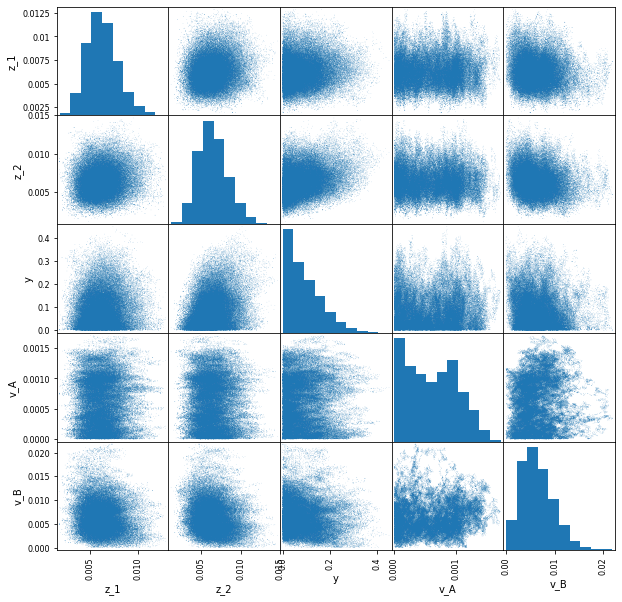

In [42]:
df = pd.DataFrame(chain)
df.columns=pars_names
pd.plotting.scatter_matrix(df,s=1,figsize=[10,10]);

In [43]:
for par in pars_names:
    dist=np.array(df[par])
    print(par+': %5.4f [%5.4f,%5.4f]' %(np.median(dist),np.percentile(dist,2.5),np.percentile(dist,97.5)))

z_1: 0.0062 [0.0036,0.0099]
z_2: 0.0063 [0.0033,0.0106]
y: 0.0735 [0.0028,0.2714]
v_A: 0.0006 [0.0000,0.0014]
v_B: 0.0060 [0.0013,0.0143]


# Findings

Data from the combined tests $1$ and $2$ for periods $A$ and $B$ are analyzed without assuming the false positive mechanisms for the two tests are independent. Data from the control studies to estimate the false positive probabilities are also included, in order to properly treat the uncertainty in the test performance.

The posterior probability for the sero-prevalence in the May snapshort (period $B$) has a median 0.60% and a 95% CL interval [0.13%, 1.43%]. The posterior probability for the sero-prevalence in the March snapshort (period $A$) has a median 0.06% and a 95% CL interval [0%, 0.14%].

The two tests have similar posteriors for false positive probability, with median of 0.6% and 95% CL interval [0.3%,1.1%]. The posterior for the parameter $y$ shows that the data strongly favours independence of the false positive mechanisms for the two tests. It is essential to include period $A$ for that finding, and to return a bounded interval for the prevalence in period $B$.